## Accessing Planet - NICFI Data on the Planetary Computer

We've partnered with the [Group on Earth Observation](https://www.earthobservations.org/geo_blog_obs.php?id=528) and [Planet](https://www.planet.com/pulse/nicfi-satellite-data-program-extended-to-include-recipients-of-the-geo-microsoft-planetary-computer-grants-program/) to provide access to data from the NICFI Satellite Data Program to winners of the GEO - Microsoft Planetary Computer grants program. Data from these collections are only available to the grantees. Others wishing to use the data can sign up and access it from Planet at https://www.planet.com/nicfi/.

In this example, we'll use the STAC API to search for items matching some spatio-temporal query.

### Data access

The datasets hosted by the Planetary Computer are available from [Azure Blob Storage](https://docs.microsoft.com/en-us/azure/storage/blobs/). We'll use [pystac-client](https://pystac-client.readthedocs.io/) to search the Planetary Computer's [STAC API](https://planetarycomputer.microsoft.com/api/stac/v1/docs) for the subset of the data that we care about, and then we'll load the data directly from Azure Blob Storage. We'll specify a `modifier` so that we can access the data stored in the Planetary Computer's private Blob Storage Containers. See [Reading from the STAC API](https://planetarycomputer.microsoft.com/docs/quickstarts/reading-stac/) and [Using tokens for data access](https://planetarycomputer.microsoft.com/docs/concepts/sas/) for more.

In [1]:
import pystac_client
import planetary_computer

catalog = pystac_client.Client.open(
    "https://planetarycomputer.microsoft.com/api/stac/v1",
    modifier=planetary_computer.sign_inplace,
)

In [2]:
point = {"type": "Point", "coordinates": (-60.556640599999994, -0.96674985)}
search = catalog.search(collections=["planet-nicfi-visual"], intersects=point)
items = search.item_collection()
len(items)

24

Next, we'll load the oldest and newest items to visually compare the change in this area over the six years.

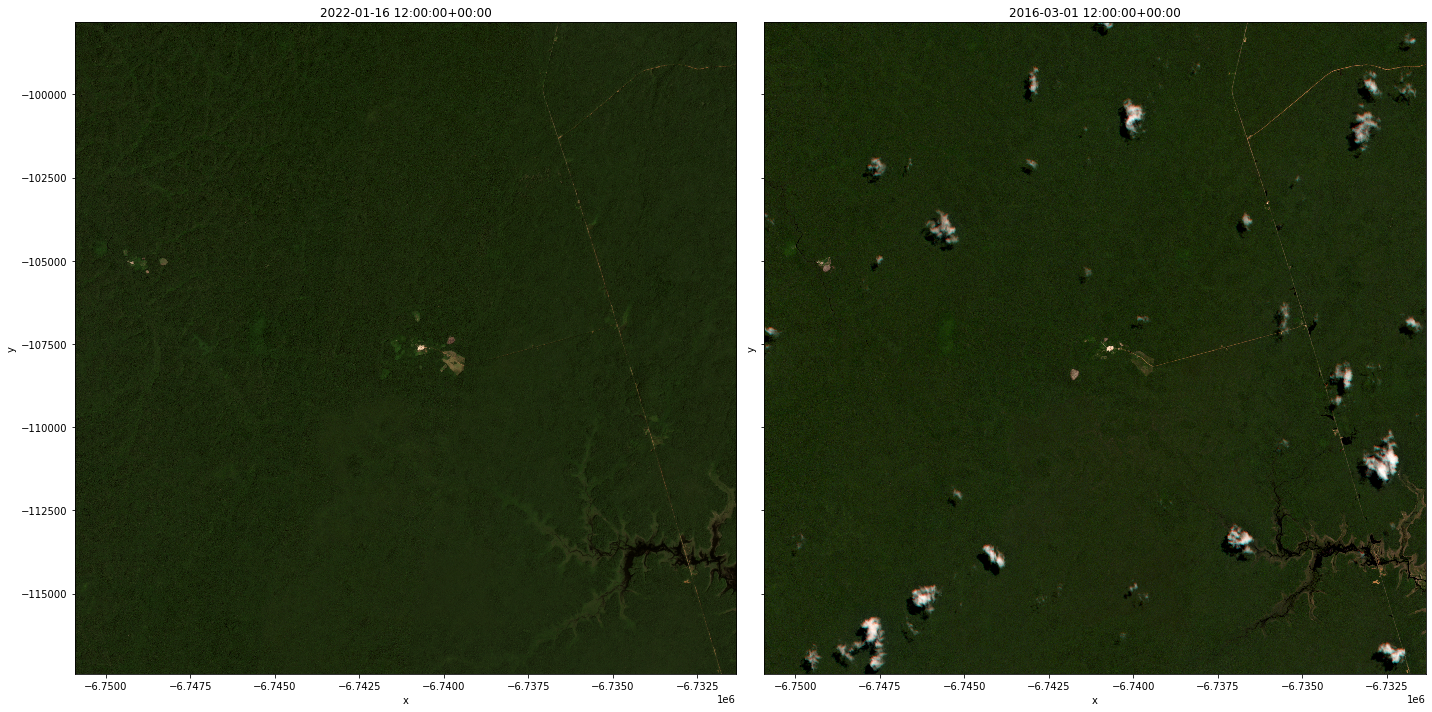

In [3]:
import rioxarray
import matplotlib.pyplot as plt

a = rioxarray.open_rasterio(items[0].assets["data"].href)
b = rioxarray.open_rasterio(items[-1].assets["data"].href)

fig, axes = plt.subplots(figsize=(20, 10), ncols=2, sharex=True, sharey=True)

a.plot.imshow(ax=axes[0], rgb="band")
axes[0].set(title=items[0].datetime)

b.plot.imshow(ax=axes[1], rgb="band")
axes[1].set(title=items[-1].datetime)
plt.tight_layout();

An analytic product is also available, which includes a near-infrared band.

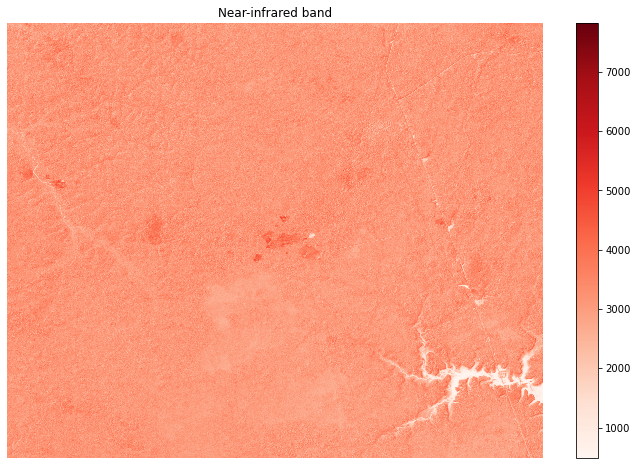

In [4]:
search = catalog.search(collections=["planet-nicfi-analytic"], intersects=point)
item = next(search.items())

mesh = (
    rioxarray.open_rasterio(item.assets["data"].href)
    .sel(band=4)
    .plot(cmap="Reds", size=8)
)
mesh.axes.set_axis_off()
mesh.axes.set(title="Near-infrared band");